# Zadanie 1. Oblicz przybliżoną wartość pochodnej funkcji,

In [220]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import seaborn as sns

sns.set_style("darkgrid")

In [221]:
def f_derivative(x, h):
    return (f(x + h) - f(x)) / h


def f(x):
    return np.tan(x)


def f_tan_actual_derivative(x):
    return 1 + np.tan(x) ** 2


def sec(x):
    return 1 / np.cos(x)


def second_derivative(x):
    return 2 * sec(x) ** 2 * np.tan(x)

In [222]:
method_list = []
rounding_list = []
computational_list = []
h_list = []

for k in range(17):
    h = 10 ** (-k)
    x = 1
    h_list.append(h)
    method_error = abs(f_derivative(x, h) - f_tan_actual_derivative(x))
    rounding_error = 2 * sys.float_info.epsilon / h
    computational_error = method_error + rounding_error
    method_list.append(method_error)
    rounding_list.append(rounding_error)
    computational_list.append(computational_error)

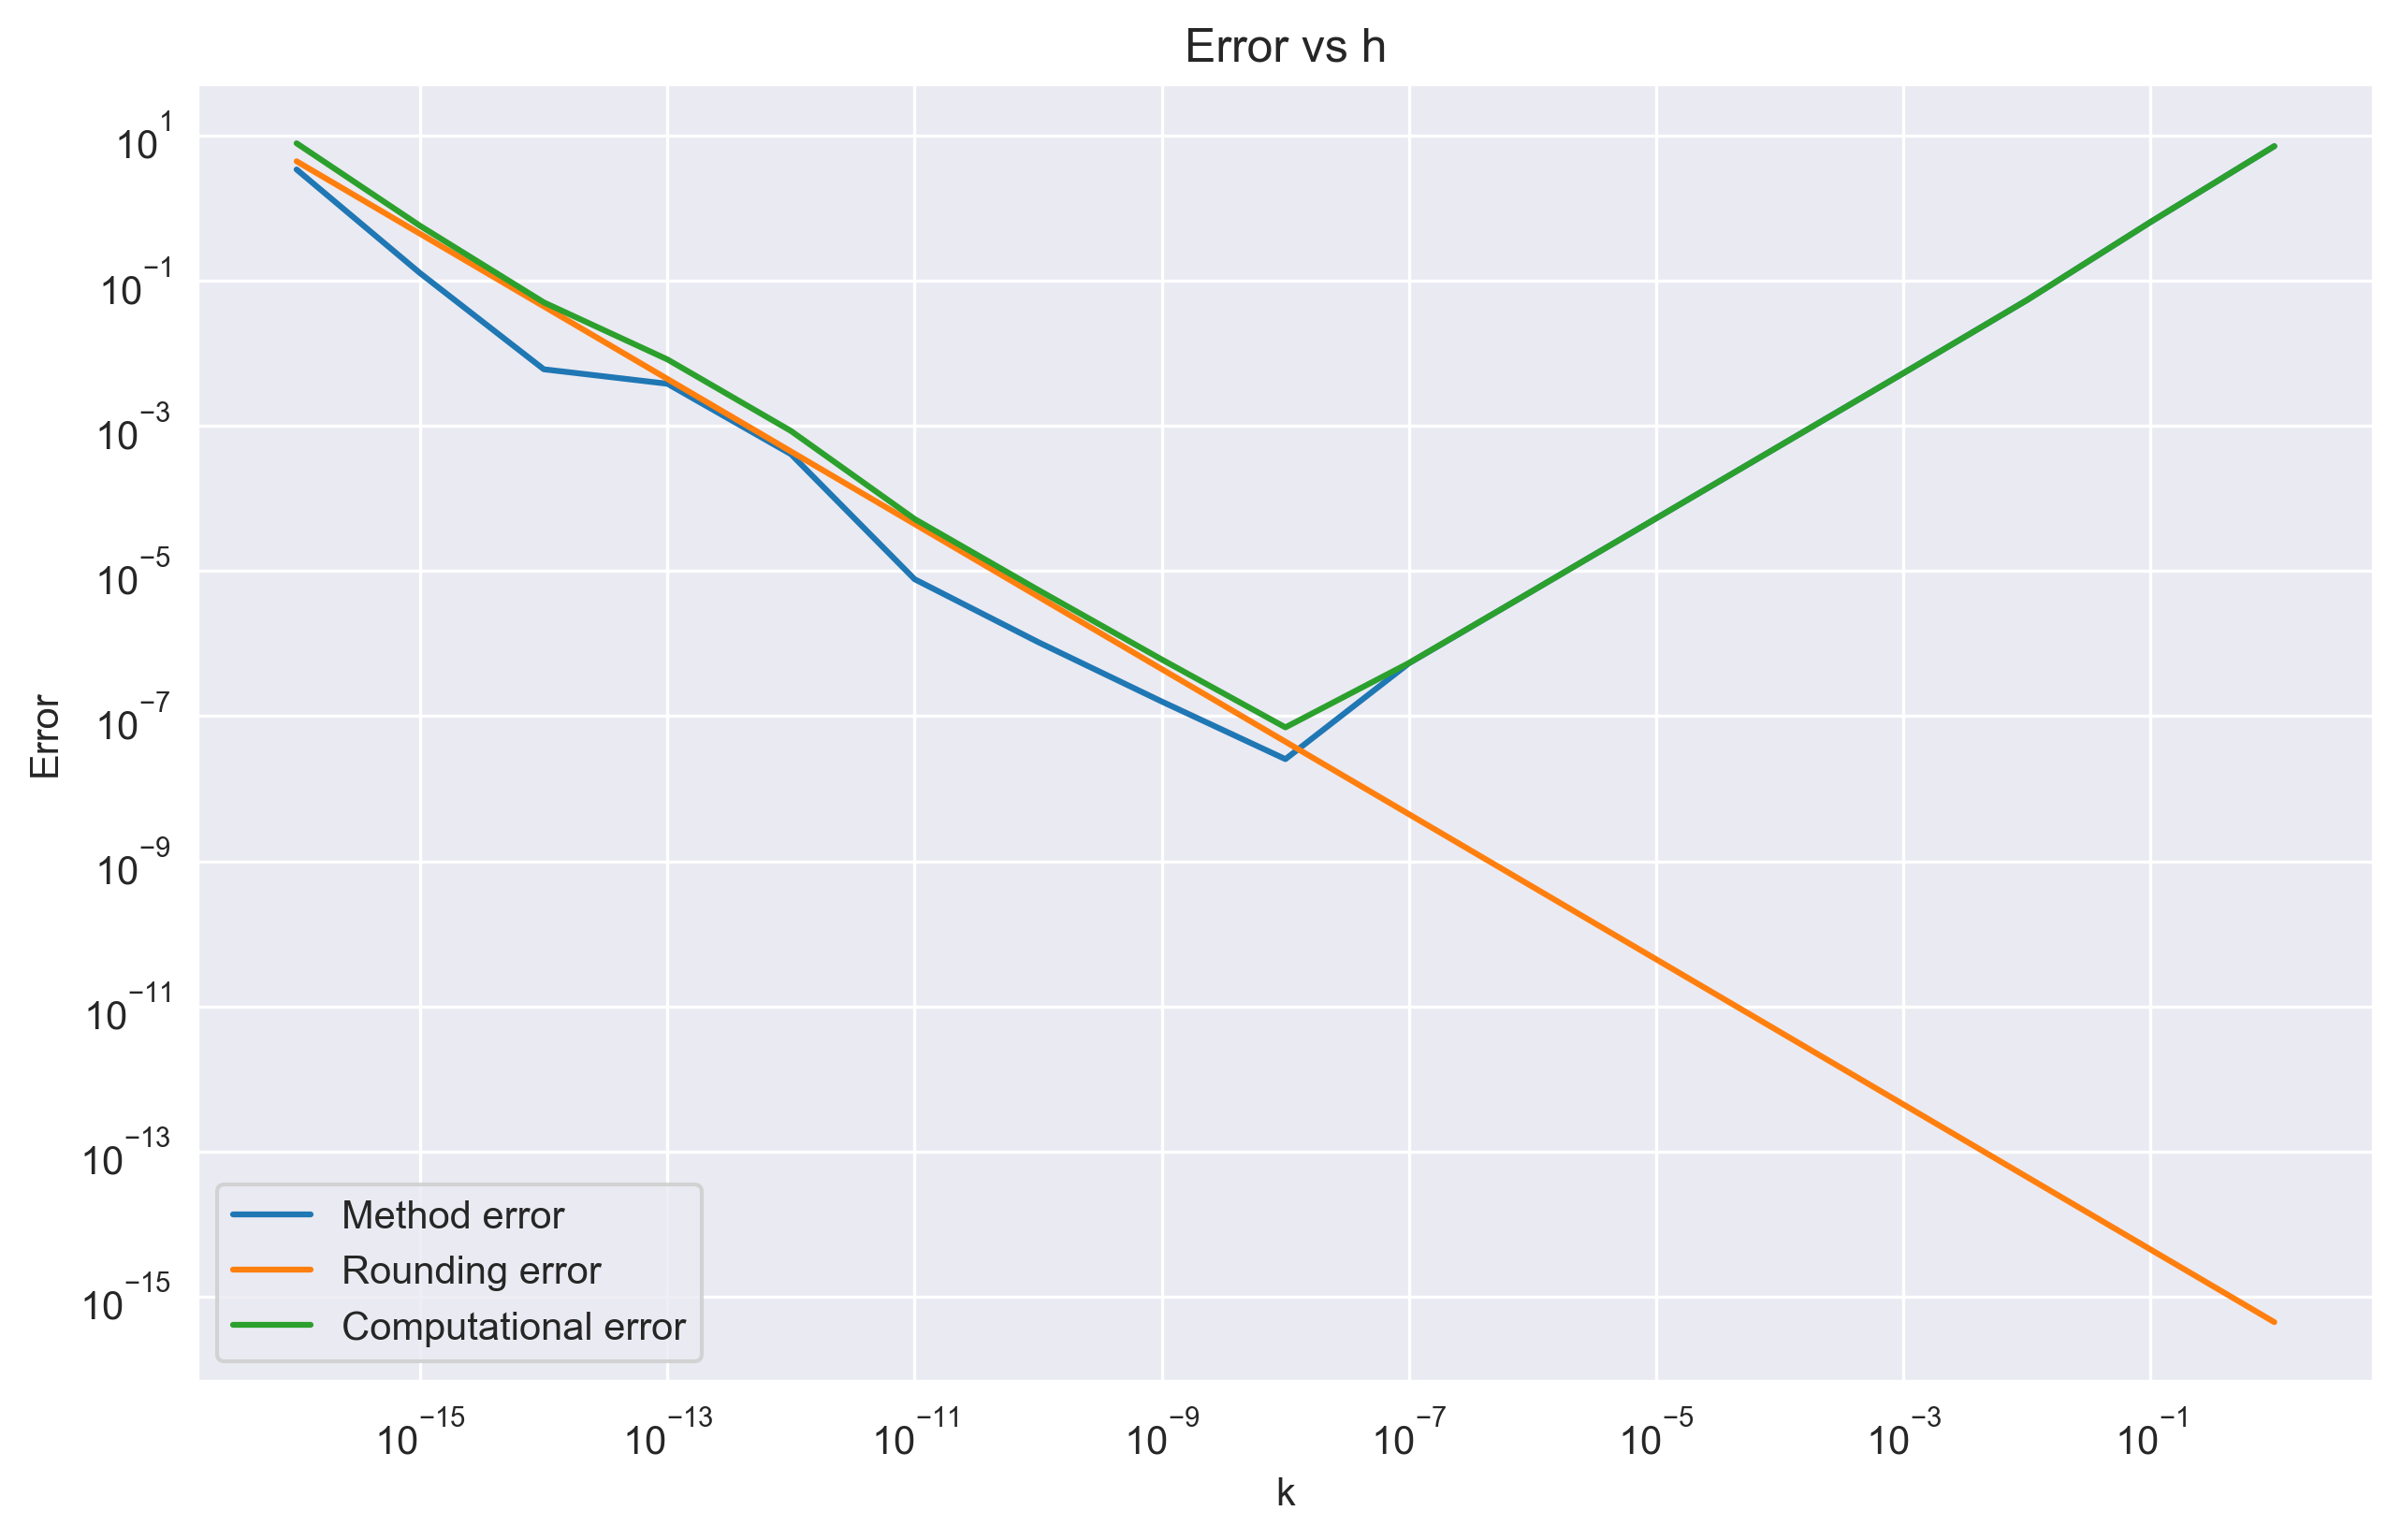

In [223]:
plt.figure(dpi=300, figsize=(10, 6))
plt.loglog(h_list, method_list, label="Method error")
plt.loglog(h_list, rounding_list, label="Rounding error")
plt.loglog(h_list, computational_list, label="Computational error")
plt.legend()
plt.xlabel("k")
plt.ylabel("Error")
plt.title("Error vs h")
plt.show()

In [224]:
computational_error_min = computational_list.index(np.min(computational_list))

h_min = 2 * np.sqrt(sys.float_info.epsilon / second_derivative(x))
print(f"the h_min is {h_min}")
print(f"Minimum computational error: {computational_error_min}")

the h_min is 9.123695225180455e-09
Minimum computational error: 8


In [225]:
def f_derivative_central(x, h):
    return (f(x + h) - f(x - h)) / (2 * h)

In [226]:
method_list = []
rounding_list = []
computational_list = []
h_list = []
for k in range(17):
    h = 10 ** (-k)
    x = 1
    h_list.append(h)
    method_error = abs(f_derivative_central(x, h) - f_tan_actual_derivative(x))
    rounding_error = sys.float_info.epsilon / h
    computational_error = method_error + rounding_error
    method_list.append(method_error)
    rounding_list.append(rounding_error)
    computational_list.append(computational_error)


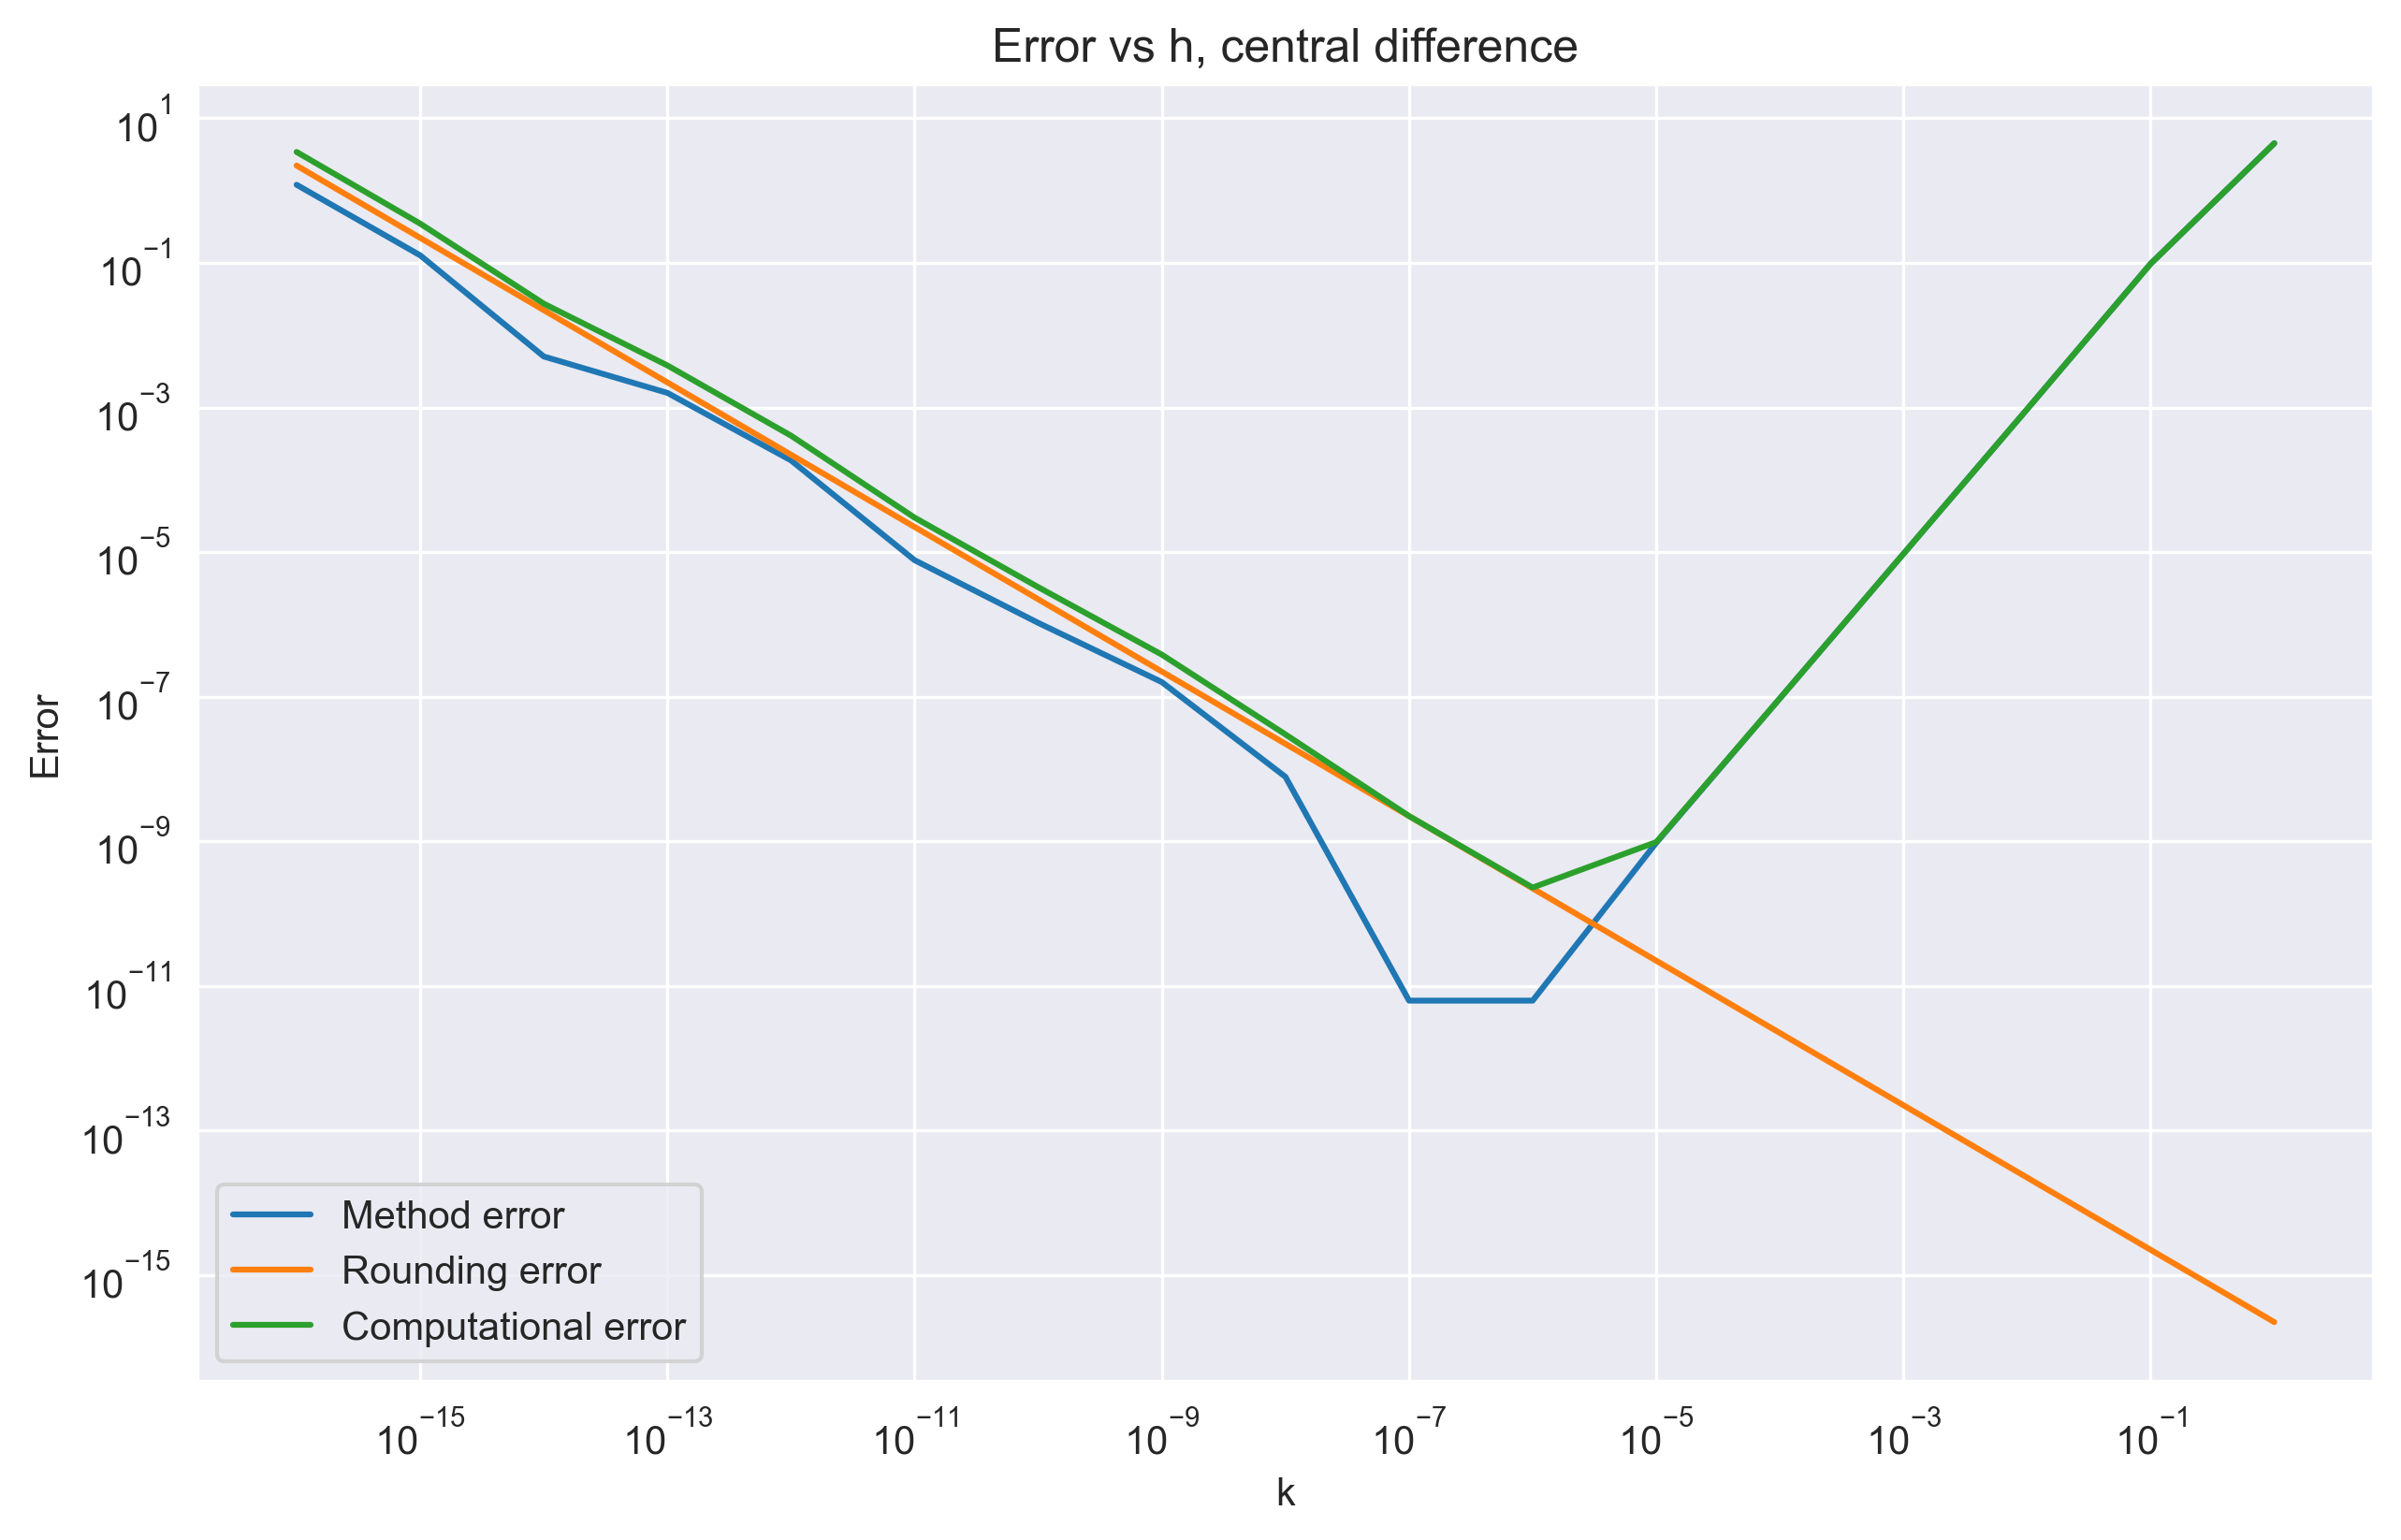

In [227]:
plt.figure(dpi=300, figsize=(10, 6))
plt.loglog(h_list, method_list, label="Method error")
plt.loglog(h_list, rounding_list, label="Rounding error")
plt.loglog(h_list, computational_list, label="Computational error")
plt.legend()
plt.xlabel("k")
plt.ylabel("Error")
plt.title("Error vs h, central difference")
plt.show()

In [228]:
def third_derivative(x):
    return 4 * sec(x) ** 2 * np.tan(x) ** 2 + 2 * sec(x) ** 4


computational_error_min = computational_list.index(np.min(computational_list))

h_min_2 = (3 * sys.float_info.epsilon / third_derivative(x)) ** (1 / 3)

print(f"the h_min is {h_min_2}")
print(f"Minimum computational error: {computational_error_min}")


the h_min is 2.273274156839064e-06
Minimum computational error: 6


In [229]:
print(f"the h_min_1 is {h_min}")
print(f"the h_min_2 is {h_min_2}")

method_error = abs(f_derivative(x, h_min) - f_tan_actual_derivative(x))
rounding_error = sys.float_info.epsilon / h_min
computational_error = method_error + rounding_error
print(computational_error)

method_error = abs(f_derivative_central(x, h_min_2) - f_tan_actual_derivative(x))
rounding_error = sys.float_info.epsilon / h_min_2
computational_error = method_error + rounding_error
print(computational_error)

the h_min_1 is 9.123695225180455e-09
the h_min_2 is 2.273274156839064e-06
4.262482708274601e-08
1.8445825949050509e-10
